<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/surplus/30032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples = 100,n_features = 1,n_informative = 1,n_targets = 1,noise = 20,random_state = 13)

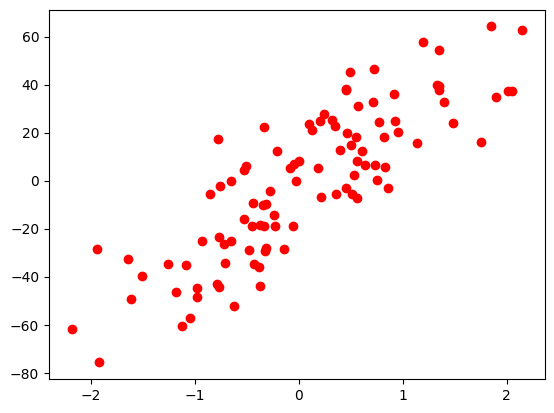

In [3]:
plt.scatter(X,y,color = 'red')

In [4]:
marr = np.linspace(-150,150,10)
barr = np.linspace(-150,150,10)

mGrid,bGrid = np.meshgrid(marr,barr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

zarr = []
for i in range(final.shape[0]):
    zarr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

zarr = np.array(zarr).reshape(10,10)

In [5]:
import plotly.graph_objects as go

fig = go.Figure([go.Surface(x = marr,y = barr,z = zarr,colorscale='Rainbow')])

fig.update_layout(title = "Cost Function",autosize = False,width = 500,height = 500,margin = dict(l=65,r = 50,b = 65,t = 90))

fig.show()

In [6]:
b = 100
m = -100
lr = 0.001      # learning rate
allb = []
allm = []
allcost = []

epochs = 20

for i in range(epochs):
    slopeb = 0
    slopem = 0
    cost = 0
    for j in range(X.shape[0]):
        slopeb = slopeb - 2*(y[j] - (m*X[j]) - b)
        slopem = slopem - 2*(y[j] - (m*X[j]) - b)*X[j]
        cost = cost + (y[j] - m*X[j] - b)**2
    b = b - (lr * slopeb)
    m = m - (lr * slopem)
    allb.append(b)
    allm.append(m)
    allcost.append(cost)

In [7]:
import plotly.express as px

fig = px.scatter_3d(x = np.array(allm).ravel(),y = np.array(allb).ravel(),z = np.array(allcost).ravel()*100)
fig.add_trace(go.Surface(x = marr,y = barr,z = zarr*100))
fig.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Assuming marr, barr, and zarr are defined elsewhere in your code

fig = px.scatter_3d(x=np.array(allm).ravel(), y=np.array(allb).ravel(), z=np.array(allcost).ravel()*100)
fig.add_trace(go.Surface(x=marr, y=barr, z=zarr*100))
fig.show()